In [1]:
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import math
import matplotlib.pyplot as plt
import tqdm as notebook_tqdm

length of x: torch.Size([400, 1])
length of y: torch.Size([400, 1])


Text(0, 0.5, 'Dependent Variable')

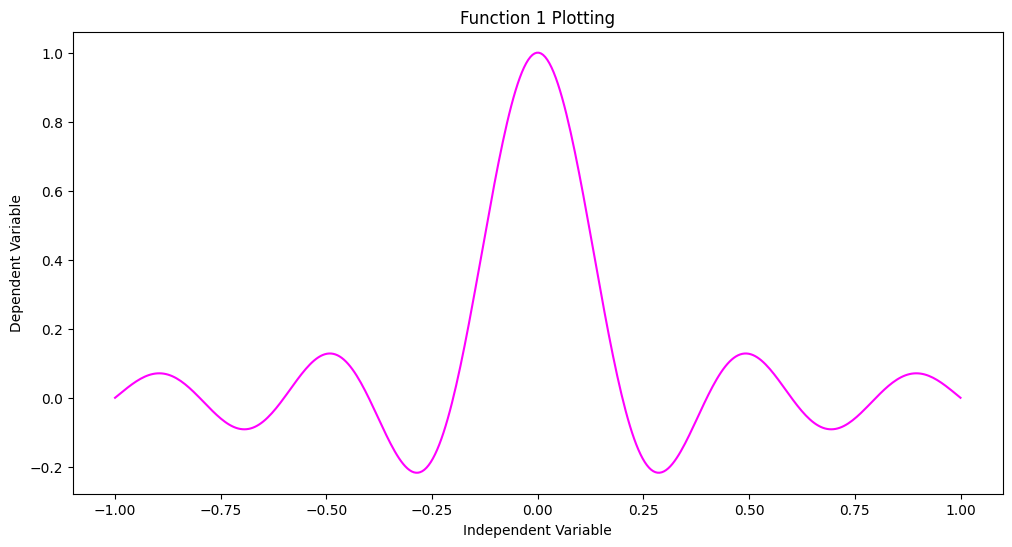

In [2]:
#FUNCTION_1
x = torch.unsqueeze(torch.linspace(-1, 1, 400), dim=1)


y = (np.sin(5*np.pi*x))/(5*np.pi*x)

print('length of x:',x.shape)
print('length of y:',y.shape)
plt.figure(figsize=(12,6))
plt.plot(x, y, color = "magenta")
plt.title('Function 1 Plotting')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')

In [3]:
class Model1(nn.Module):
    def __init__(self,):
        super().__init__()
        # hidden layers
        self.hiddenlayer1 = nn.Linear(1, 5)   
        self.hiddenlayer2 = nn.Linear(5, 10)
        self.hiddenlayer3 = nn.Linear(10, 10)
        self.hiddenlayer4 = nn.Linear(10, 10)
        self.hiddenlayer5 = nn.Linear(10, 10)
        self.hiddenlayer6 = nn.Linear(10, 10)
        self.hiddenlayer7 = nn.Linear(10, 5)
    
        self.output = nn.Linear(5, 1)   

       
    def forward(self, x):
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))
        x = F.relu(self.hiddenlayer3(x))
        x = F.relu(self.hiddenlayer4(x))
        x = F.relu(self.hiddenlayer5(x))
        x = F.relu(self.hiddenlayer6(x))
        x = F.relu(self.hiddenlayer7(x))
     
        x = self.output(x)            
        return x     
        

#defining the model
model1 = Model1()

optimizer = torch.optim.Adam(model1.parameters(), lr=0.001, weight_decay = 0.0001)

loss_function = torch.nn.MSELoss()  

summation=[]

for j in model1.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 1:', np.sum(summation),)


print("\nModel 1 weight and bias before training\n")

for par in model1.state_dict():
    print(par, "\t",model1.state_dict()[par])

Number of parameters in Model 1: 571

Model 1 weight and bias before training

hiddenlayer1.weight 	 tensor([[-0.8642],
        [ 0.1259],
        [-0.3738],
        [-0.6190],
        [-0.8308]])
hiddenlayer1.bias 	 tensor([ 0.8036, -0.4837, -0.5439,  0.2213,  0.1637])
hiddenlayer2.weight 	 tensor([[-0.0726, -0.0967, -0.3170, -0.2467,  0.3671],
        [-0.4160,  0.4046,  0.3014, -0.4470,  0.1381],
        [ 0.4406, -0.4328,  0.2440,  0.0302,  0.2499],
        [-0.2774, -0.3557,  0.3606, -0.0019,  0.4280],
        [-0.1836,  0.1541,  0.3000, -0.0336, -0.0620],
        [ 0.2231, -0.2149, -0.2862, -0.3439, -0.0648],
        [-0.4461,  0.0708, -0.1125, -0.1183,  0.1921],
        [ 0.3996, -0.2919,  0.3893, -0.2523, -0.2929],
        [-0.2779,  0.4361, -0.0286,  0.1167,  0.1133],
        [ 0.1670, -0.4304, -0.0569, -0.1844, -0.2390]])
hiddenlayer2.bias 	 tensor([ 0.3802, -0.1551,  0.3474,  0.2473,  0.3743,  0.2104, -0.1827,  0.3838,
        -0.0271,  0.0099])
hiddenlayer3.weight 	 tensor(

In [4]:
def testing(model,x,y):
    maximum_epoch = 20000
    epoch_array = []
    loss_array = []
    epoch = 0
    not_converged = True
    while not_converged:
        
        
        prediction = model(x)     
        loss = loss_function(prediction, y)
       
        optimizer.zero_grad()
       
        loss.backward()         
        optimizer.step() 
        epoch_array.append(epoch)
        loss_array.append(loss.detach().numpy())
        
        epoch = epoch + 1
        
        if epoch % 100 == 0 : print(f'epoch: {epoch}, loss = {loss.item():.4f}')
                
        if epoch == maximum_epoch:
                print("Reached to Maximum number of Epoch")
                not_converged = False
        elif (epoch > 5) and  (loss_array[-1] < 0.001):
            if abs(loss_array[-3] - loss_array[-2]) < 1.0e-05 and abs(loss_array[-2] - loss_array[-1]) < 0.0001:
                print("Converged:",loss_array[-1])
                not_converged = False
                
    return epoch_array,loss_array,prediction

In [5]:
x = x.clone().detach()
y = y.clone().detach()

In [8]:
Model1epoch_array,Model1loss_array,Model1prediction = testing(model1,x,y)

epoch: 100, loss = 0.0029
epoch: 200, loss = 0.0029
epoch: 300, loss = 0.0029
epoch: 400, loss = 0.0029
epoch: 500, loss = 0.0029
epoch: 600, loss = 0.0030
epoch: 700, loss = 0.0029
epoch: 800, loss = 0.0029
epoch: 900, loss = 0.0029
epoch: 1000, loss = 0.0029
epoch: 1100, loss = 0.0029
epoch: 1200, loss = 0.0029
epoch: 1300, loss = 0.0029
epoch: 1400, loss = 0.0029
epoch: 1500, loss = 0.0029
epoch: 1600, loss = 0.0029
epoch: 1700, loss = 0.0029
epoch: 1800, loss = 0.0029
epoch: 1900, loss = 0.0030
epoch: 2000, loss = 0.0029
epoch: 2100, loss = 0.0029
epoch: 2200, loss = 0.0029
epoch: 2300, loss = 0.0029
epoch: 2400, loss = 0.0029
epoch: 2500, loss = 0.0029
epoch: 2600, loss = 0.0029
epoch: 2700, loss = 0.0029
epoch: 2800, loss = 0.0029
epoch: 2900, loss = 0.0029
epoch: 3000, loss = 0.0029
epoch: 3100, loss = 0.0029
epoch: 3200, loss = 0.0029
epoch: 3300, loss = 0.0029
epoch: 3400, loss = 0.0029
epoch: 3500, loss = 0.0029
epoch: 3600, loss = 0.0029
epoch: 3700, loss = 0.0029
epoch: 380

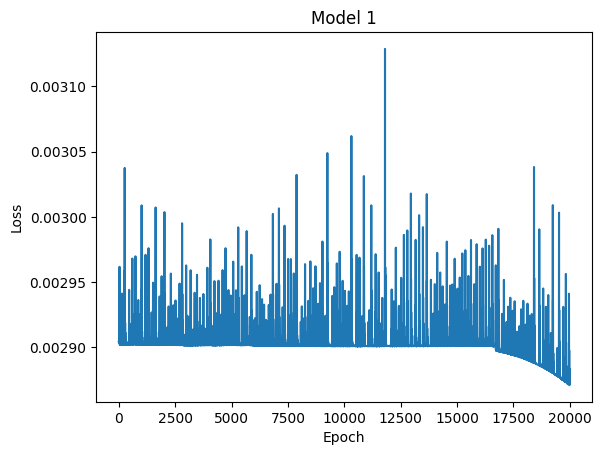

In [10]:
#Error_VS_Epoch_Plot
plt.plot(Model1epoch_array, Model1loss_array)
plt.title('Model 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

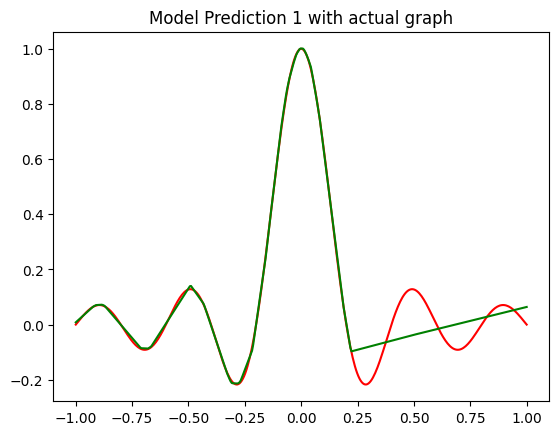

In [17]:
#Comparison with the actual plot


plt.plot(x.numpy(),y.numpy(),color="red")

plt.plot(x,Model1prediction.data.numpy(),color="green")
plt.title('Model Prediction 1 with actual graph')
plt.show()

In [12]:
class Model2(nn.Module):
    def __init__(self,):
        super().__init__()
       
        self.hiddenlayer1 = nn.Linear(1, 10)   
        self.hiddenlayer2 = nn.Linear(10, 18)
        self.hiddenlayer3 = nn.Linear(18, 15)
        self.hiddenlayer4 = nn.Linear(15, 4)
       
        self.output = nn.Linear(4, 1)   

    def forward(self, x):
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))
        x = F.relu(self.hiddenlayer3(x))
        x = F.relu(self.hiddenlayer4(x))
        x = self.output(x)            
        return x     
        

        

model2 = Model2()

optimizer = torch.optim.Adam(model2.parameters(), lr=0.005, weight_decay = 0.00015)

loss_function = torch.nn.MSELoss()  

summation=[]

for j in model2.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 2:', np.sum(summation),)


print("\nModel 2 weight and bias before training\n")

for param in model2.state_dict():
    print(param, "\t",model2.state_dict()[param])

Number of parameters in Model 2: 572

Model 2 weight and bias before training

hiddenlayer1.weight 	 tensor([[ 0.2407],
        [ 0.0424],
        [ 0.1076],
        [ 0.8139],
        [-0.5475],
        [ 0.9854],
        [-0.9556],
        [ 0.1703],
        [ 0.3373],
        [-0.9729]])
hiddenlayer1.bias 	 tensor([-0.2003,  0.1816, -0.4745,  0.0592,  0.9939, -0.4213,  0.8676,  0.8408,
         0.8130, -0.8552])
hiddenlayer2.weight 	 tensor([[-1.2002e-01, -2.6176e-01, -2.3276e-01,  1.3734e-01, -2.6143e-01,
          2.1081e-02,  1.2874e-01, -2.8725e-01, -4.5572e-02, -1.1197e-01],
        [-2.9082e-01, -2.8165e-01, -7.5421e-03,  2.8388e-01,  8.9760e-02,
         -1.2252e-01, -1.1943e-01, -2.4647e-01,  1.0933e-01,  4.7306e-02],
        [ 2.4996e-01, -1.1391e-01,  7.1398e-02, -1.3649e-01,  7.9852e-02,
         -2.7370e-01, -2.7470e-01,  2.3387e-01, -1.2439e-01,  3.2700e-02],
        [ 1.6465e-01,  9.4518e-02, -2.2448e-01,  2.5239e-01,  1.2136e-01,
          2.3985e-02, -2.7094e-01,  1.

In [13]:
Model2epoch_array,Model2loss_array,Model2prediction = testing(model2,x,y)

epoch: 100, loss = 0.0809
epoch: 200, loss = 0.0050
epoch: 300, loss = 0.0025
epoch: 400, loss = 0.0022
epoch: 500, loss = 0.0018
epoch: 600, loss = 0.0013
Converged: 0.0009150727


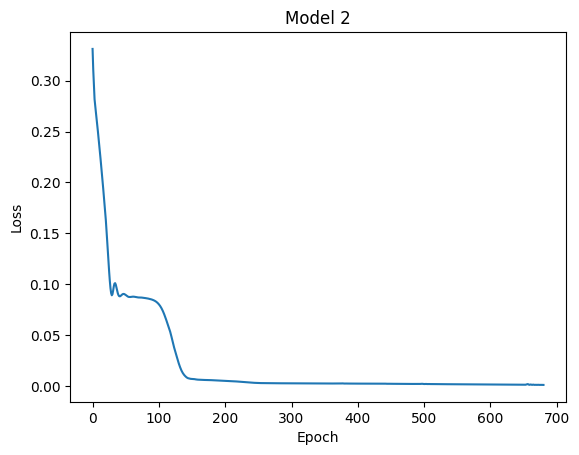

In [14]:
plt.plot(Model2epoch_array, Model2loss_array)
plt.title('Model 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

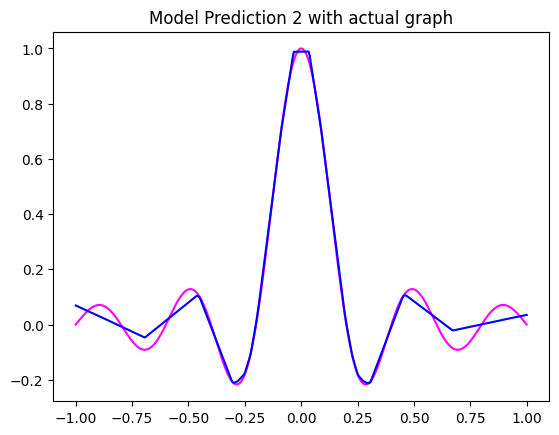

In [16]:
#Comparison with the actual plot
plt.plot(x.numpy(),y.numpy(),color="magenta")

plt.plot(x,Model2prediction.data.numpy(),color="blue")
plt.title('Model Prediction 2 with actual graph')
plt.show()

In [18]:
class Model3(nn.Module):
    def __init__(self,):
        super().__init__()
      
        self.hiddenlayer = nn.Linear(1, 190)   
       

     
        self.output = nn.Linear(190, 1)   

       
    def forward(self, x):
        x = F.relu(self.hiddenlayer(x))      
        x = self.output(x)
      
    
        return x     
        


model3 = Model3()

optimizer = torch.optim.Adam(model3.parameters(), lr=0.001, weight_decay = 0.0001)


loss_function = torch.nn.MSELoss()  

summation=[]

for j in model3.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 3:', np.sum(summation),)

print("Model 3 weight and bias before training")

for param in model3.state_dict():
    print(param, "\t",model3.state_dict()[param])

Number of parameters in Model 3: 571
Model 3 weight and bias before training
hiddenlayer.weight 	 tensor([[ 0.6956],
        [-0.5018],
        [-0.3579],
        [-0.5213],
        [ 0.9821],
        [-0.7851],
        [-0.9653],
        [ 0.8841],
        [-0.4682],
        [ 0.9899],
        [-0.7042],
        [ 0.0231],
        [-0.7183],
        [ 0.4081],
        [-0.9291],
        [ 0.2075],
        [ 0.5800],
        [-0.0333],
        [-0.2316],
        [-0.0529],
        [-0.6297],
        [ 0.4125],
        [ 0.4275],
        [ 0.9336],
        [ 0.2629],
        [-0.2817],
        [ 0.4736],
        [ 0.5335],
        [ 0.9699],
        [ 0.6776],
        [-0.1695],
        [-0.1239],
        [ 0.9775],
        [-0.5265],
        [-0.4720],
        [ 0.9686],
        [-0.2464],
        [-0.0650],
        [-0.0833],
        [ 0.2465],
        [ 0.1375],
        [-0.1109],
        [-0.2773],
        [ 0.8591],
        [-0.2540],
        [-0.4809],
        [-0.6868],
        [

In [19]:
Model3epoch_array,Model3loss_array,Model3prediction = testing(model3,x,y)

epoch: 100, loss = 0.0678
epoch: 200, loss = 0.0555
epoch: 300, loss = 0.0443
epoch: 400, loss = 0.0342
epoch: 500, loss = 0.0253
epoch: 600, loss = 0.0184
epoch: 700, loss = 0.0136
epoch: 800, loss = 0.0104
epoch: 900, loss = 0.0085
epoch: 1000, loss = 0.0074
epoch: 1100, loss = 0.0066
epoch: 1200, loss = 0.0061
epoch: 1300, loss = 0.0056
epoch: 1400, loss = 0.0053
epoch: 1500, loss = 0.0049
epoch: 1600, loss = 0.0046
epoch: 1700, loss = 0.0044
epoch: 1800, loss = 0.0042
epoch: 1900, loss = 0.0040
epoch: 2000, loss = 0.0039
epoch: 2100, loss = 0.0038
epoch: 2200, loss = 0.0037
epoch: 2300, loss = 0.0036
epoch: 2400, loss = 0.0035
epoch: 2500, loss = 0.0035
epoch: 2600, loss = 0.0034
epoch: 2700, loss = 0.0034
epoch: 2800, loss = 0.0034
epoch: 2900, loss = 0.0034
epoch: 3000, loss = 0.0034
epoch: 3100, loss = 0.0034
epoch: 3200, loss = 0.0033
epoch: 3300, loss = 0.0033
epoch: 3400, loss = 0.0033
epoch: 3500, loss = 0.0033
epoch: 3600, loss = 0.0033
epoch: 3700, loss = 0.0033
epoch: 380

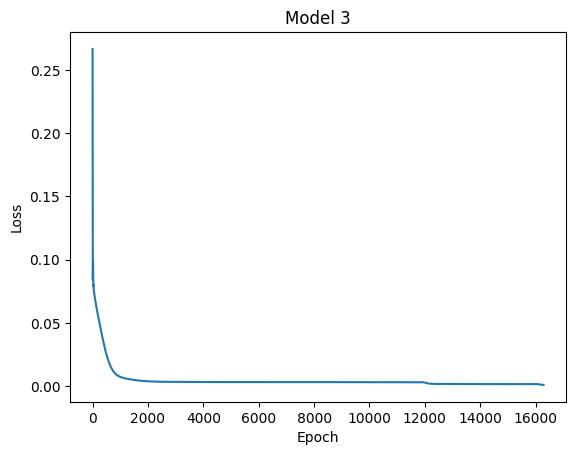

In [20]:
plt.plot(Model3epoch_array, Model3loss_array)
plt.title('Model 3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

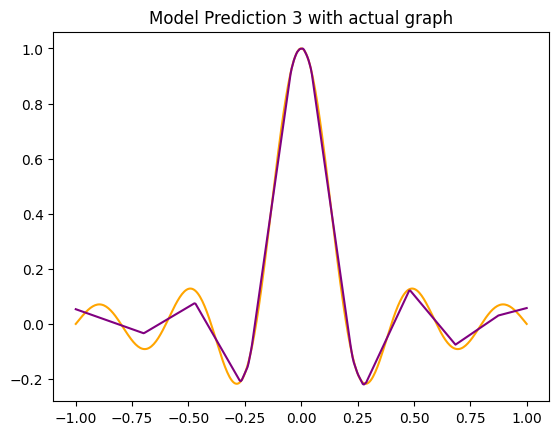

In [21]:

plt.plot(x.numpy(),y.numpy(),color="orange")

plt.plot(x,Model3prediction.data.numpy(),color="purple")
plt.title('Model Prediction 3 with actual graph')
plt.show()

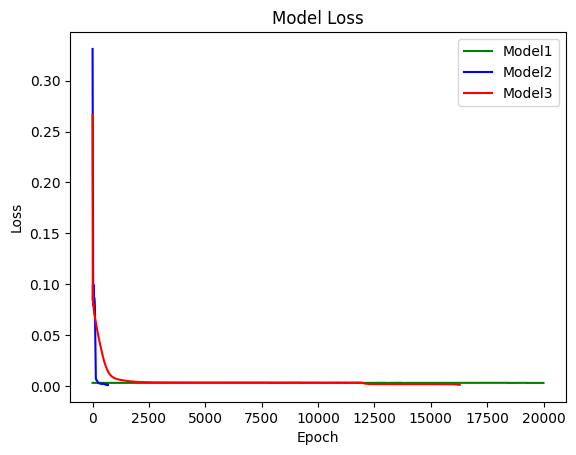

In [22]:
#functions vs epochs

plt.plot(Model1epoch_array,Model1loss_array, color = "green")
plt.plot(Model2epoch_array,Model2loss_array, color = "blue")
plt.plot(Model3epoch_array,Model3loss_array, color = "red")
plt.title('Model Loss')
plt.legend(['Model1', 'Model2','Model3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('lossepoch.png')
plt.show()

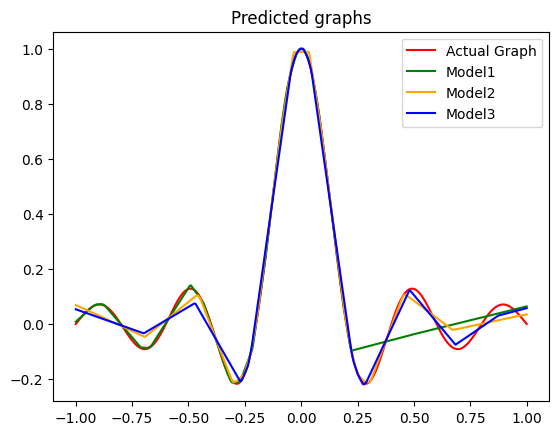

In [23]:

plt.plot(x.numpy(),y.numpy(),color="red")

plt.plot(x,Model1prediction.data.numpy(),color="green")
plt.plot(x,Model2prediction.data.numpy(),color="orange")
plt.plot(x,Model3prediction.data.numpy(),color="blue")
plt.title('Predicted graphs')
plt.legend(['Actual Graph', 'Model1', 'Model2','Model3'])
plt.savefig('Predicted Graphs.png')
plt.show()